<a href="https://colab.research.google.com/github/b-suarez/youtube_stats_analysis/blob/main/Youtube_GIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Load libraries



In [13]:
import os
import io
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import statistics as st
import pandas as pd
import zipfile
import math
import re
import itertools
from wordcloud import WordCloud, STOPWORDS 
from sklearn.preprocessing import PowerTransformer
import datetime as dt
import pickle
from tqdm import tqdm, trange
from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.stats import sem

from scipy.stats import anderson

%matplotlib inline


# Load data


## Code to get the data from Kaggle

In [14]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [15]:
# Since the data is a line of characters, it is possible to use:

user_key=uploaded['kaggle.json'].decode("utf-8", errors="ignore")

user = user_key[13:28] #Select the rigth position for your name
key= user_key[37:-2] #Select the rigth positions for the key

#Other method

user_key_2 = pd.read_json('kaggle.json', lines=True)





In [16]:
url="https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv"

In [17]:

os.environ['KAGGLE_USERNAME'] = user # username from the json file
os.environ['KAGGLE_KEY'] = key # key from the json file
!kaggle datasets download -d datasnaek/youtube-new # api copied from kaggle

401 - Unauthorized


## Code to load the data at the "local cloud"

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will focus on DE, GB, MX and US. Two from America and two from Europe

In [19]:
# Unzip yhe data

zf = zipfile.ZipFile('/content/drive/MyDrive/datasets/YOUTUBE/youtube-new.zip', 'r')


In [20]:
# Germany 

videos_DE = zf.open(zipfile.ZipFile.namelist(zf)[3])

data_DE = pd.read_csv(videos_DE,encoding='maccentraleurope')

# Great Britain

videos_GB = zf.open(zipfile.ZipFile.namelist(zf)[7])

data_GB = pd.read_csv(videos_GB, encoding=' iso-8859-1')

# Mexico

videos_MX = zf.open(zipfile.ZipFile.namelist(zf)[15])

data_MX = pd.read_csv(videos_MX,encoding='latin1')

# United States of America 

videos_US = zf.open(zipfile.ZipFile.namelist(zf)[19])

data_US = pd.read_csv(videos_US, encoding=' iso-8859-1')

In [21]:
data=[data_DE,data_GB,data_MX,data_US]

# Exploring data

## Getting familiar with the data (overall exploration)

We verify the data has been loaded properly

In [22]:
# Uncomment the code you want to visualize the data

#data_GB.head()
#data_MX.head()
data_DE.head(50)
#data_US.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup √ľber den (ver√§nderten) Beat v...
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,False,False,False,Wir haben Meinungsstudie.de (‚Ėļ http://bit.ly...
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""t√ľrken""|""schule""|""schulzeit...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,False,False,False,4 unbekannte Gesichter animierter Charaktere (...
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ern√§hrungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ern√...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,False,False,False,Antoine hat sich ein Auto ausgeliehen..schaut ...
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Ber√ľhmt werden kann jeder, aber ber√ľhmt blei..."


It stands out the format of the date for the atributes `trending_date` and `publish_time`. The first one yy.dd.mm and the second one yy-mm-dd. In order to work with the data, it is necessary to standarize the formats.

The atributes `comments_disabled`, `ratings_disabled` and `video_error_or_removed`, seems to be mainly set to `False`.

In [23]:

True_data_comment= [data_DE.comments_disabled.value_counts()[1],data_GB.comments_disabled.value_counts()[1],data_MX.comments_disabled.value_counts()[1],
            data_US.comments_disabled.value_counts()[1]]
True_data_rating= [data_DE.ratings_disabled.value_counts()[1],data_GB.ratings_disabled.value_counts()[1],data_MX.ratings_disabled.value_counts()[1],
            data_US.ratings_disabled.value_counts()[1]]
True_data_error= [data_DE.video_error_or_removed.value_counts()[1],data_GB.video_error_or_removed.value_counts()[1],data_MX.video_error_or_removed.value_counts()[1],
            data_US.video_error_or_removed.value_counts()[1]]

mean_value=np.mean([len(data_DE),len(data_GB),len(data_MX),len(data_US)])

True_data =[True_data_comment,True_data_rating,True_data_error]

(True_data/mean_value)*100

array([[2.59127802, 1.69525181, 1.09210951, 1.57114845],
       [1.66794907, 0.67512224, 1.57363052, 0.41946933],
       [0.03474894, 0.17126263, 0.05956961, 0.05708754]])

It is possible confirm that overall, $+95\%$ of the data is at the `False` category. Therefore, we will not consider the data in the `True` categories for our first analysis and models of the data.

In [24]:
data_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

One can see the there is no null-value and the attributes `category_id`, `views`, `likes`, `dislikes` and `comment_count`have an expected type int64.

## Data visualization




### Plot category

#### Load metada

In [25]:
# Germany

metadata_DE = zf.open(zipfile.ZipFile.namelist(zf)[2])

metadata_DE = pd.read_json(metadata_DE,encoding='maccentraleurope')

# Great Britain

metadata_GB = zf.open(zipfile.ZipFile.namelist(zf)[6])

metadata_GB = pd.read_json(metadata_GB, encoding=' iso-8859-1')

# Mexico

metadata_MX = zf.open(zipfile.ZipFile.namelist(zf)[14])

metadata_MX = pd.read_json(metadata_MX,encoding='latin1')

# United States of America 

metadata_US = zf.open(zipfile.ZipFile.namelist(zf)[18])

metadata_US = pd.read_json(metadata_US, encoding=' iso-8859-1')

#### Dictionaries with the descriptive names of each category and its numeric category

In [26]:
#4 empty dictionaries
category_DE={}
category_GB={}
category_MX={}
category_US={}

#dictionaries and metadata in two matching lists by index

categories = [category_DE,category_GB,category_MX,category_US]

metadata=[metadata_DE,metadata_GB,metadata_MX,metadata_US]

#iterating the data to create a list of dictionaries

for category in categories:
  for i in range(len(metadata[categories.index(category)]['items'])):

    key=metadata[categories.index(category)]['items'][i]['id']
    value=metadata[categories.index(category)]['items'][i]['snippet']['title']
    category[key] = value



The dictionaries are compared to ensure that all 4 dataset have the same keys.

In [27]:
for i in range(0,3):
  print(categories[0].keys()==categories[i].keys())


True
True
True


In [28]:
category_id_count_DE  = data_DE['category_id'].value_counts()
category_id_count_GB  = data_GB['category_id'].value_counts()
category_id_count_MX  = data_MX['category_id'].value_counts()
category_id_count_US  = data_US['category_id'].value_counts()



category_id_count=[category_id_count_DE,category_id_count_GB,category_id_count_MX,category_id_count_US]

counts_per_category_DE={}
counts_per_category_GB={}
counts_per_category_MX={}
counts_per_category_US={}

counts_per_category=[counts_per_category_DE,counts_per_category_GB,counts_per_category_MX,counts_per_category_US]

category=categories[0]



for j in range(len(counts_per_category)):

  for i in range(len(category_id_count[j])):

    try:
      key=category[str(category_id_count[j].index[i])]
    except KeyError:
      key='Unknown_category_'+str(category_id_count[j].index[i])
    
    try:
      value=category_id_count[j].values[i]
    except:
      value='No_value'
    
    counts_per_category[j][key]=value
    


There is a missing name on the category description

#### Plot category

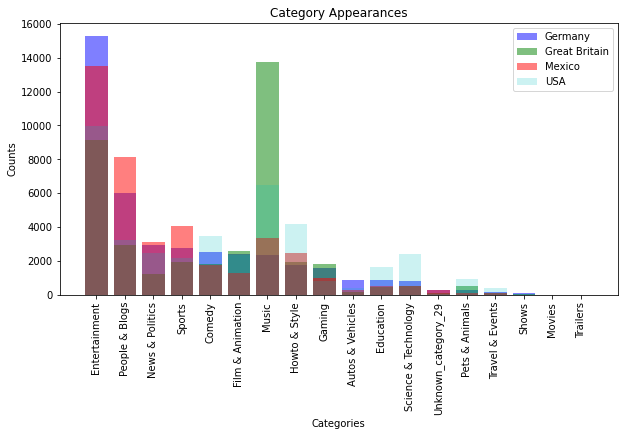

In [29]:
plt.figure(figsize=(10,5))

labels=['Germany','Great Britain','Mexico','USA']

plt.bar(counts_per_category[0].keys(), counts_per_category[0].values(), color = 'b',alpha=0.5)
plt.bar(counts_per_category[1].keys(), counts_per_category[1].values(), color = 'g',alpha=0.5)
plt.bar(counts_per_category[2].keys(), counts_per_category[2].values(), color = 'r',alpha=0.5)
plt.bar(counts_per_category[3].keys(), counts_per_category[3].values(), color = 'c',alpha=0.2)
plt.xticks(rotation=90)
plt.title("Category Appearances",  loc='center')
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.legend(labels)


plt.show()



We get a hint that different areas may be interested on different topics. We will findout up to what extend the diferences are statistically siginificant.

Plot `views`, `likes`, `dislikes` and `comment_count`

In [30]:
# Initilize empty dictionaries
keys = ['DE','GB','MX','US']
views_count = dict.fromkeys(keys, None)
likes_count = dict.fromkeys(keys, None)
dislikes_count = dict.fromkeys(keys, None)
comment_count_counts = dict.fromkeys(keys, None)

# Create list of dictionaries
counts_video_properties = [views_count,likes_count,dislikes_count,comment_count_counts]

#list of data

data=[data_DE,data_GB,data_MX,data_US]

#labels

labels_list=['views','likes','dislikes','comment_count']

#Popilate lists
for label in labels_list:
  for key in keys:
    counts_video_properties[labels_list.index(label)][key]=data[keys.index(key)][label].value_counts()



### Plot `views`

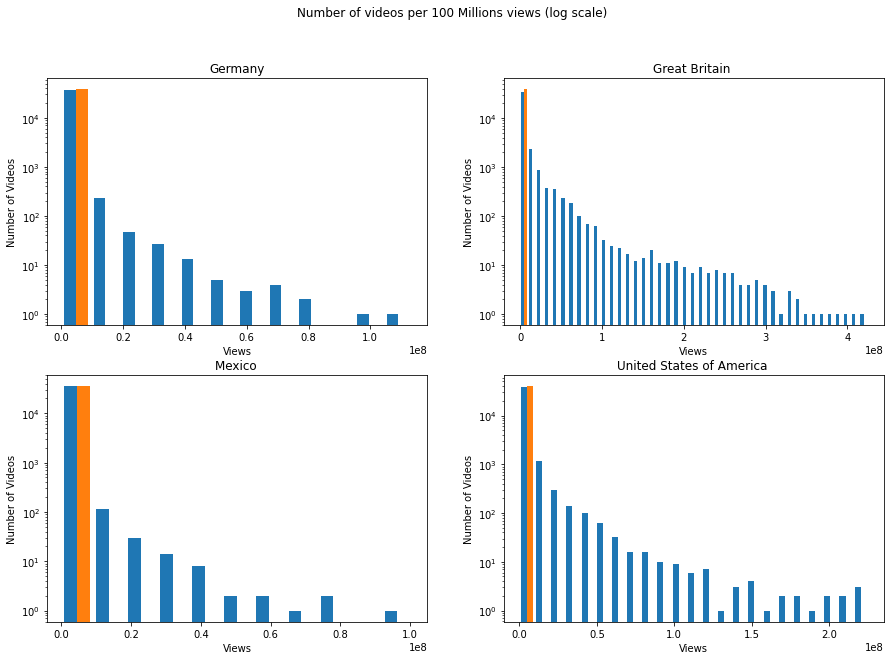

In [31]:

view_DE=(counts_video_properties[0]['DE'].index.tolist(),counts_video_properties[0]['DE'].tolist())
view_GB=(counts_video_properties[0]['GB'].index.tolist(),counts_video_properties[0]['GB'].tolist())
view_MX=(counts_video_properties[0]['MX'].index.tolist(),counts_video_properties[0]['MX'].tolist())
view_US=(counts_video_properties[0]['US'].index.tolist(),counts_video_properties[0]['US'].tolist())

w = 10_000_000

plt.figure(figsize=(15,10))

plt.subplot(221)
n = math.ceil((max(view_DE[0]) - min(view_DE[0]))/w)
plt.hist(view_DE, bins = n)
plt.yscale('log')
plt.title("Germany",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")


plt.subplot(222)
n = math.ceil((max(view_GB[0]) - min(view_GB[0]))/w)
plt.hist(view_GB, bins = n)
plt.yscale('log')
plt.title("Great Britain ",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")


plt.subplot(223)
n = math.ceil((max(view_MX[0]) - min(view_MX[0]))/w)
plt.hist(view_MX, bins = n)
plt.yscale('log')
plt.title("Mexico ",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")


plt.subplot(224)
n = math.ceil((max(view_US[0]) - min(view_US[0]))/w)
plt.hist(view_US, bins = n)
plt.yscale('log')
plt.title("United States of America ",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")

plt.suptitle('Number of videos per 100 Millions views (log scale)')
plt.show()




### Plot `likes`

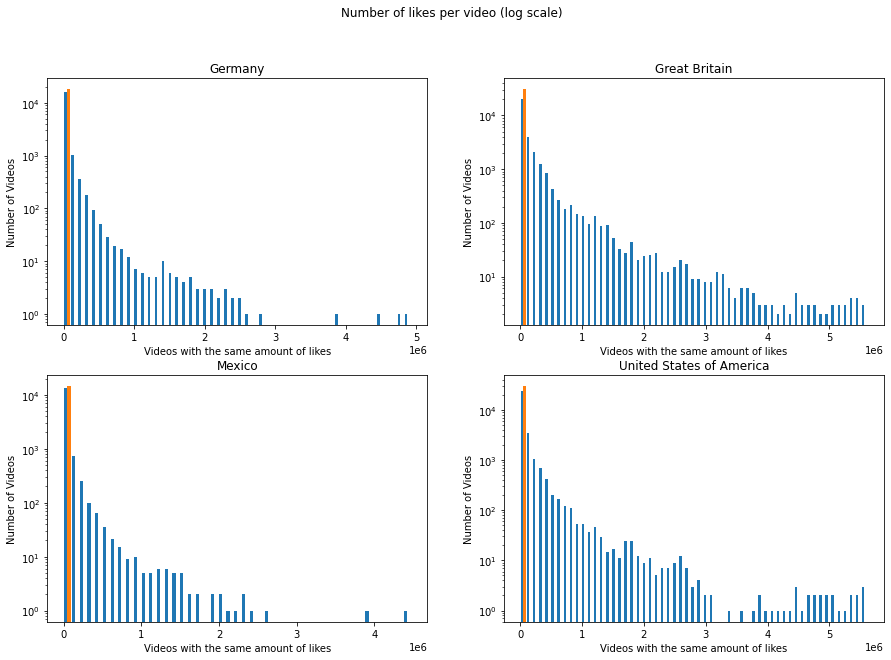

In [32]:
likes_DE=(counts_video_properties[1]['DE'].index.tolist(),counts_video_properties[1]['DE'].tolist())
likes_GB=(counts_video_properties[1]['GB'].index.tolist(),counts_video_properties[1]['GB'].tolist())
likes_MX=(counts_video_properties[1]['MX'].index.tolist(),counts_video_properties[1]['MX'].tolist())
likes_US=(counts_video_properties[1]['US'].index.tolist(),counts_video_properties[1]['US'].tolist())

title_label=["Germany","Great Britain", "Mexico", "United States of America"]


likes_per_country = [likes_DE,likes_GB,likes_MX,likes_US]

w = 100_000

plt.figure(figsize=(15,10))

for like in likes_per_country:

  index_like=likes_per_country.index(like)
  n = math.ceil((max(like[0]) - min(like[0]))/w)
  plt.subplot(2, 2, index_like+1)
  plt.hist(like, bins = n)
  plt.yscale('log')
  plt.title(title_label[index_like],  loc='center')
  plt.xlabel("Videos with the same amount of likes")
  plt.ylabel("Number of Videos")  



plt.suptitle('Number of likes per video (log scale)')
plt.show()




### Plot `dislikes`


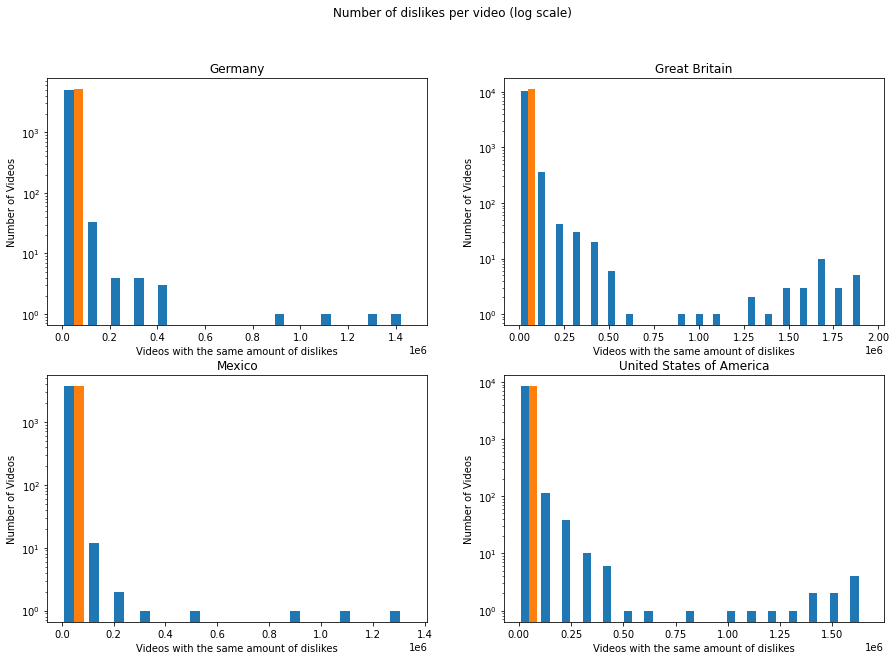

In [33]:
dislikes_DE=(counts_video_properties[2]['DE'].index.tolist(),counts_video_properties[2]['DE'].tolist())
dislikes_GB=(counts_video_properties[2]['GB'].index.tolist(),counts_video_properties[2]['GB'].tolist())
dislikes_MX=(counts_video_properties[2]['MX'].index.tolist(),counts_video_properties[2]['MX'].tolist())
dislikes_US=(counts_video_properties[2]['US'].index.tolist(),counts_video_properties[2]['US'].tolist())

dislikes_per_country=[dislikes_DE,dislikes_GB,dislikes_MX,dislikes_US]

w = 100_000

plt.figure(figsize=(15,10))

for dlike in dislikes_per_country:

  index_dlike=dislikes_per_country.index(dlike)
  n = math.ceil((max(dlike[0]) - min(dlike[0]))/w)
  plt.subplot(2, 2, index_dlike+1)
  plt.hist(dlike, bins = n)
  plt.yscale('log')
  plt.title(title_label[index_dlike],  loc='center')
  plt.xlabel("Videos with the same amount of dislikes")
  plt.ylabel("Number of Videos")  



plt.suptitle('Number of dislikes per video (log scale)')
plt.show()

### Plot `comment_count`

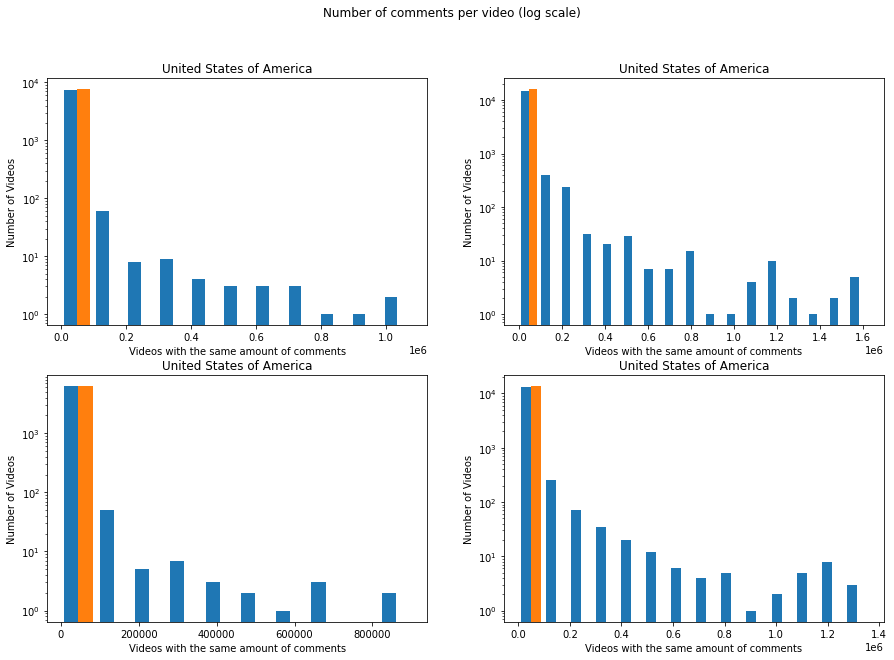

In [34]:
cc_DE=(counts_video_properties[3]['DE'].index.tolist(),counts_video_properties[3]['DE'].tolist())
cc_GB=(counts_video_properties[3]['GB'].index.tolist(),counts_video_properties[3]['GB'].tolist())
cc_MX=(counts_video_properties[3]['MX'].index.tolist(),counts_video_properties[3]['MX'].tolist())
cc_US=(counts_video_properties[3]['US'].index.tolist(),counts_video_properties[3]['US'].tolist())

cc_per_country=[cc_DE,cc_GB,cc_MX,cc_US]

w = 100_000

plt.figure(figsize=(15,10))

for cc in cc_per_country:

  index_cc=cc_per_country.index(cc)
  n = math.ceil((max(cc[0]) - min(cc[0]))/w)
  plt.subplot(2, 2, index_cc+1)
  plt.hist(cc, bins = n)
  plt.yscale('log')
  plt.title(title_label[index_dlike],  loc='center')
  plt.xlabel("Videos with the same amount of comments")
  plt.ylabel("Number of Videos")  



plt.suptitle('Number of comments per video (log scale)')
plt.show()

### Plot Word Cloud for video tags

#### Tags to list

In [35]:
tags_DE=[]
tags_GB=[]
tags_MX=[]
tags_US=[]

tags=[tags_DE,tags_GB,tags_MX,tags_US]

counter=0

for i in range(4):
  data_tags=data[i]['tags']

  for tag in data_tags:
   
    tags[i].append(re.findall(r'"(.*?)"', tag))
    counter += 1


#### Word Cloud



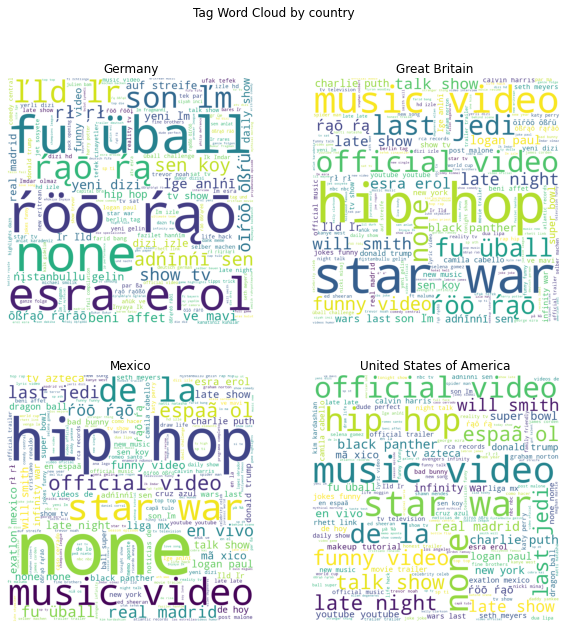

In [36]:


comment_words = '' 
stopwords = set(STOPWORDS) 

plt.figure(figsize=(10,10), facecolor = None)
wordcloud=[]

for j in range(4):
  for val in data[j]['tags']: 
      
      # typecaste each val to string 
      val = str(val)
      #val=val.replace("√§","v")  # Some corrections for German
      #val=val.replace("√", "u")  # Some corrections for German
    
  
      # split the value 
      tokens = val.split()
    
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud=WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.subplot(2, 2, j+1)                         
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.title(title_label[j],  loc='center')
  

plt.suptitle('Tag Word Cloud by country') 
plt.show()

the tags need quiete some cleaning. Many problems come from the fact that non standar english characters are not properli recognized. The same problems are found at the video title attribute. Anyhow some relevant topics seems to arise. Football for Germany. Starwars for the other countries. Music videos, it appears that hip hop seems to be relevant.

## Descriptive Statistics

Germany

In [37]:
pd.concat([data[0].describe(),
           pd.DataFrame(data[0].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[0].kurt() , columns = ["Kurtosis"] ).T])


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04,NaN,NaN,NaN
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03,NaN,NaN,NaN
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04,NaN,NaN,NaN
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01,NaN,NaN,NaN
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,NaN,NaN,NaN
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03,NaN,NaN,NaN
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06,NaN,NaN,NaN
Median,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,0.000000,0.000000,0.000000
Kurtosis,2.511423,4.881453e+02,5.636242e+02,5.645977e+03,1.459557e+03,34.149335,55.797517,2912.499909


Great Britain

In [38]:
pd.concat([data[1].describe(),
           pd.DataFrame(data[1].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[1].kurt() , columns = ["Kurtosis"] ).T])

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04,NaN,NaN,NaN
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04,NaN,NaN,NaN
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04,NaN,NaN,NaN
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02,NaN,NaN,NaN
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03,NaN,NaN,NaN
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03,NaN,NaN,NaN
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,NaN,NaN,NaN
Median,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03,0.000000,0.000000,0.000000
Kurtosis,-1.071541,1.154120e+02,6.646395e+01,8.752774e+02,3.447289e+02,52.002738,138.098465,559.073759


Mexico

In [39]:
pd.concat([data[2].describe(),
           pd.DataFrame(data[2].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[2].kurt() , columns = ["Kurtosis"] ).T])

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000,NaN,NaN,NaN
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008,NaN,NaN,NaN
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797,NaN,NaN,NaN
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN
25%,20.000000,1.681300e+04,2.990000e+02,1.700000e+01,42.000000,NaN,NaN,NaN
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000,NaN,NaN,NaN
75%,24.000000,2.068940e+05,7.226000e+03,2.670000e+02,885.000000,NaN,NaN,NaN
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000,NaN,NaN,NaN
Median,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000,0.000000,0.000000,0.000000
Kurtosis,3.175815,8.129144e+02,8.018319e+02,9.703995e+03,1854.607182,86.955984,58.826181,1680.666809


United States of America

In [40]:
pd.concat([data[3].describe(),
           pd.DataFrame(data[3].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[3].kurt() , columns = ["Kurtosis"] ).T])

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,NaN,NaN,NaN
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,NaN,NaN,NaN
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,NaN,NaN,NaN
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,NaN,NaN,NaN
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,NaN,NaN,NaN
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,NaN,NaN,NaN
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,NaN,NaN,NaN
Median,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,0.000000,0.000000,0.000000
Kurtosis,0.342947,2.323803e+02,1.778471e+02,1.987423e+03,5.321442e+02,59.713502,237.335044,1775.608813


### Conclusions

* The relative diference between median and mean is for all the cases above $2\%$. The values of the kurtosis test for all the cases are out of the range -2 to +2. Therefore, the atributes are not following a normal distribution.

* Due to the plot data and the differences between max and min, anad mean and median is clear the presence of extremelly different values. These values are, in principle, not errors but extremelly popular videos.

# Data cleaning

## Remove `True` observations from logical atributes

In [41]:
data_treat=[]

for dt in data:
  data_treat.append(dt[(dt['comments_disabled']== False) & 
                            (dt['ratings_disabled']== False) & 
                            (dt['video_error_or_removed']== False)])

In [42]:
for i in range(4):

  print(round((len(data_treat[i])/len(data[i]))*100,2))

96.33
97.94
97.62
98.24


In [43]:
#Remove columsn with constant values

for df in data_treat:

  drop_cols=['comments_disabled','ratings_disabled','video_error_or_removed']

  df.drop(drop_cols, axis=1, inplace=True)
  df.reset_index(drop=True, inplace=True)#Reset indexes

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
data_treat[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup √ľber den (ver√§nderten) Beat v...


We are preserving $+96\%$ of the data

## Remove missing category information (category = 29)

In [45]:
for i in range(4):

  data_treat[i]=data_treat[i][(data_treat[i]['category_id']!= 29)]
  data_treat[i].reset_index(drop=True, inplace=True)#Reset indexes

In [46]:
for i in range(4):

  print(round((len(data_treat[i])/len(data[i]))*100,2))

95.77
97.71
97.25
98.11


We still preserve $+95\%$ of the information of each dataset

In [47]:
data_treat[0].head(50)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup √ľber den (ver√§nderten) Beat v...
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,Wir haben Meinungsstudie.de (‚Ėļ http://bit.ly...
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""t√ľrken""|""schule""|""schulzeit...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,Video mit Planet Kanax: https://youtu.be/3U51c...
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,4 unbekannte Gesichter animierter Charaktere (...
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ern√§hrungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ern√...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,Antoine hat sich ein Auto ausgeliehen..schaut ...
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,"Ber√ľhmt werden kann jeder, aber ber√ľhmt blei..."


## Date formats

### Trending date

In [48]:
#yy.dd.mm
data_treat_temp=data_treat

for i in range(4):
  data_treat_temp[i]['trending_date'] = pd.to_datetime(data_treat_temp[i]['trending_date'],format='%y.%d.%m') 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Publish time	

In [49]:
data_treat_temp=data_treat

data_treat_temp[0].head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup √ľber den (ver√§nderten) Beat v...
5,xapGFgWqtg4,2017-11-14,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,Wir haben Meinungsstudie.de (‚Ėļ http://bit.ly...
6,EIM7RMe39JY,2017-11-14,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""t√ľrken""|""schule""|""schulzeit...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,Video mit Planet Kanax: https://youtu.be/3U51c...
7,PaWTaj6Iie0,2017-11-14,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,4 unbekannte Gesichter animierter Charaktere (...
8,GHct2dGNLks,2017-11-14,Antoine leiht Auto von Ern√§hrungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ern√...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,Antoine hat sich ein Auto ausgeliehen..schaut ...
9,aZYSFByDGkg,2017-11-14,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,"Ber√ľhmt werden kann jeder, aber ber√ľhmt blei..."


In [50]:
#yy-mm-dd

for i in range(len(data_treat_temp)):

  for j in range(len(data_treat_temp[i]['publish_time'])):
    
    data_treat_temp[i].loc[j,'publish_time'] =pd.to_datetime(data_treat_temp[i].loc[j,'publish_time'][0:10],format='%Y-%m-%d') 


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [51]:
data_treat=data_treat_temp

Before continue, the indexes are reset

In [52]:
for i in range(4):
  data_treat[i]=data_treat[i].reset_index(drop=True)

## Lenguage Cleaning

Some characters not properlly encoded


In [53]:
#Latin characters

def replace_latin(text):
  # https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

  rep = {"Â¿":"¿","Â¡":"¡","Ã\x81":"Á","Ã¡": "á","Ã\x89":"É", "Ã©": "é","Ã\x91":"Ñ","Ã±":"ñ",
         "Ã\x93":"Ó","Ã³":"ó","Ã\x9a":"Ú","Ãº":"ú","Ã¼":"ü","Ã\x8d":"Í","Ã\xad":"í","â\x9c¨":"%",
         "â\x98\x85":"","â\x80¢":"&","oÌ\x81":"ó","ð\x9f\x94":"","Âº":"º","Ã":"í"}



  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) #correct latin 
  
  return(text)

def remove_emotes(text):

  text_c=" ".join(filter(lambda x:x[0]!='ð', text.split()))
  return(text_c)

In [54]:
text_att=['title','channel_title','tags','description']


for dt in data_treat:

  for att in text_att:

    print(att)

    for i in range(len(dt[att])):
      try:
        dt.loc[i, att] = replace_latin(dt.loc[i, att])
      except:
        dt.loc[i, att] = 'Error'
      try:
        dt.loc[i, att] = remove_emotes(dt.loc[i, att])
      except:
        dt.loc[i, att] = 'Error'

title
channel_title
tags
description
title
channel_title
tags
description
title
channel_title
tags
description
title
channel_title
tags
description


In [55]:
def special_delete(text):
  # https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

  rep = {"\\n":" ","â\x9c©":"","Äď":"","‚ÄĘ":"","‚úė":""}



  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) 
  
  return(text)

def replace_german(text):
  # https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

  rep = {"√§":"ä","√ľ":"ü","√ü":"ß","√∂":"ö","√©":"é"}



  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) 
  
  return(text) 


In [56]:
text_att=['title','channel_title','tags','description']

with tqdm(total=100) as pbar:

  step = 100/len(data_treat)

  for dt in data_treat:

    for att in text_att:

    

      for i in range(len(dt[att])):
        try:
          dt.loc[i, att] = special_delete(dt.loc[i, att])
        except:
          dt.loc[i, att] = 'Error'
        try:
          dt.loc[i, att] = replace_german(dt.loc[i, att])
        except:
          dt.loc[i, att] = 'Error'
    pbar.update(step)

100%|██████████| 100.0/100 [44:46<00:00, 26.86s/it]


The bulk of the text has been corrected. At this point, there are still missing Arabic, Turkish and Chinese characters that has not been corrected because it falls beyond of my knowledge.

## Saving data

In [57]:
#dump data

#temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp", "wb")
#temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_18_12", "wb")
#pickle.dump(data_treat,temporal_data)
#temporal_data.close()


#read

temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_18_12", "rb")

data_treat=pickle.load(temporal_data)

FileNotFoundError: ignored

# Metrics and  transformation

As we could state, the data is not following a normal distribution which can difficult a statistical analysis. Even more, it is hard to know if a data is an outlier because a video with high number of views might low number of views (example: click bite). It is also possible that a video with low count of views has a high number of comments (controversial video). It is also reasonable to think that only a small proportion of videos get a fairly large number of view and comments.

To solve this issues, we follow two approaches:

* Introduce mentrics to normalize the data.
* Power transformation on the data


## Metric `relative video-sentiment`(`rvs`): (likes-dislikes)/sum(likes+dislikes)

This metrics allows us to normalize the overall sentiment to 1. If the video has overall negative felling the parameter will be negative, otherwise will be positive.

In [59]:
for dt in data_treat:

  dt['rvs']=round((dt['likes']-dt['dislikes'])/(dt['likes']+dt['dislikes']),3)

In [60]:
#Counting values

counts_per_rvs=[]
for dt in data_treat:
  counts_per_rvs.append(dt['rvs'].value_counts())

In [61]:
#generate a list for the number of times that each element appears per country
crvs_DE =[]
crvs_GB =[]
crvs_MX =[]
crvs_US =[]

crvs_per_country=[crvs_DE,crvs_GB,crvs_MX,crvs_US]

for i in range(4):
  crvs_per_country[i].append(counts_per_rvs[i].index.tolist())
  crvs_per_country[i].append(counts_per_rvs[i].tolist())
  

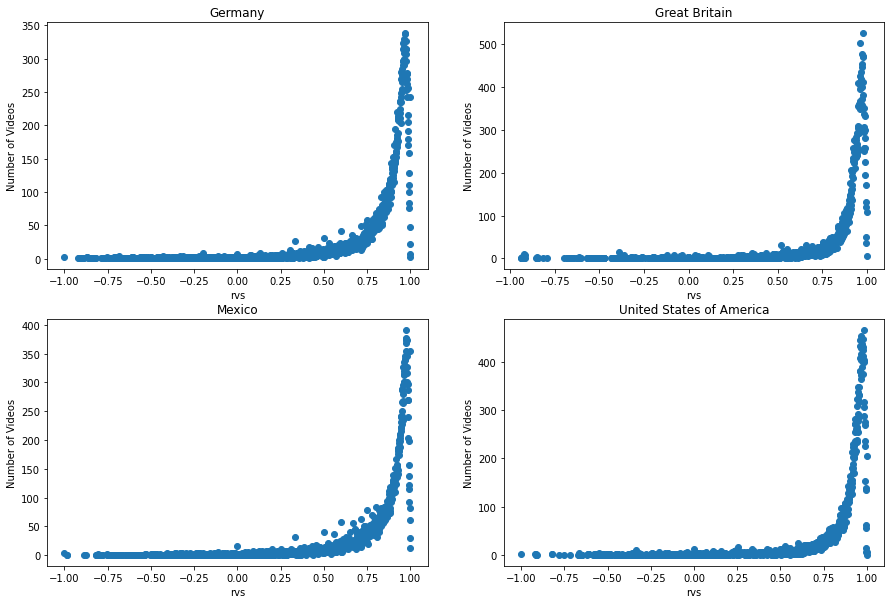

In [62]:
title_label=['Germany','Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,10))

index_=1

for crvsc in crvs_per_country:

  plt.subplot(2,2,index_)
  plt.scatter(crvsc[0],crvsc[1])
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel("rvs")
  plt.ylabel("Number of Videos") 
  index_+=1 

plt.show()

In [63]:
#saving data
temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_18_12", "wb")
pickle.dump(data_treat,temporal_data)
temporal_data.close()

FileNotFoundError: ignored

As first impression, one can see that the trending videos have more likes than dislikes and that a video to become likely get trending has to have a ratio likes to dislikes of about $75\%$

## Metric `rel_relevance`: `comment_count`/(`likes`+`dislikes`)

It is fair to assume that it takes more effort to comment a video than like or dislike a video. It is also fair to assume that video will become more commented when either the viewer has something to tell about the topic of the video or when some other comment has open a controversy.

According to these assumptions if a value for our attribute `rel_relevance` is close to 1 we will assume that we are treating a video that is relevant to its viewers or has been somewhat relevant for its viewers. A value higher than 1 will mark a video highly relevant for its viewers.


In [64]:
for dt in data_treat:

  dt['rel_relevance']=round((dt['comment_count'])/(dt['likes']+dt['dislikes']),3)

In [65]:
#Counting values

counts_per_rel_relevance=[]
for dt in data_treat:
  counts_per_rel_relevance.append(dt['rel_relevance'].value_counts())

In [66]:
#generate a list for the number of times that each element appears per country
rel_relevance_DE =[]
rel_relevance_GB =[]
rel_relevance_MX =[]
rel_relevance_US =[]

rel_relevance_per_country=[rel_relevance_DE,rel_relevance_GB,rel_relevance_MX,rel_relevance_US]

for i in range(4):
  rel_relevance_per_country[i].append(counts_per_rel_relevance[i].index.tolist())
  rel_relevance_per_country[i].append(counts_per_rel_relevance[i].tolist())
  

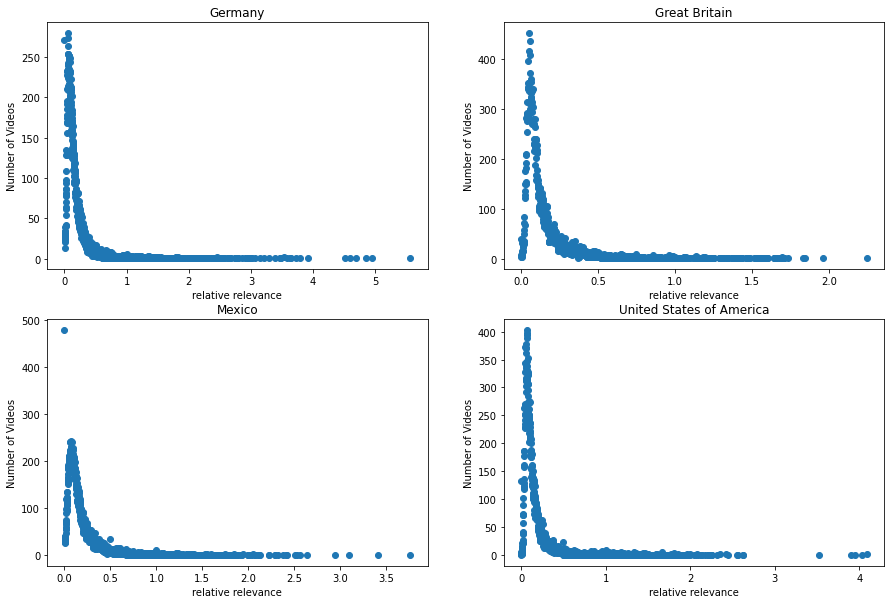

In [67]:
title_label=['Germany','Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,10))

index_=1

for rel in rel_relevance_per_country:

  plt.subplot(2,2,index_)
  plt.scatter(rel[0],rel[1])
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel("relative relevance")
  plt.ylabel("Number of Videos") 
  index_+=1 

plt.show()

As we expected most of the data is below 1. Actually most of the trending videos has a ration between likes+dislikes to number of comments bellow 0.5. The peck is about 0.25 and after that the relative relevance decreases rapidly.

## Metric `positive sentiment_engagement`, `positive sentiment_engagement` and `overall sentiment_engagement`: `likes`/`views`, `dislikes`/`views`, (`likes`-`dislikes`)/`views` 

In [68]:
for dt in data_treat:

  dt['positive sentiment_engagement']=round((dt['likes'])/(dt['views']),3)

In [69]:
for dt in data_treat:

  dt['negative sentiment_engagement']=round((dt['dislikes'])/(dt['views']),3)

In [70]:
for dt in data_treat:

  dt['overall_sentiment_engagement']=round((dt['likes']-dt['dislikes'])/(dt['views']),3)

In [71]:
#Counting values positives

counts_per_poseng=[]
for dt in data_treat:
  counts_per_poseng.append(dt['positive sentiment_engagement'].value_counts())

In [72]:
#Counting values negatives

counts_per_negeng=[]
for dt in data_treat:
  counts_per_negeng.append(dt['negative sentiment_engagement'].value_counts())

In [73]:
#Counting values negatives

counts_per_oveng=[]
for dt in data_treat:
  counts_per_oveng.append(dt['overall_sentiment_engagement'].value_counts())

In [74]:
#generate a list for the number of times that each element appears per country
poseng_DE =[]
poseng_GB =[]
poseng_MX =[]
poseng_US =[]

poseng_per_country=[poseng_DE,poseng_GB,poseng_MX,poseng_US]

for i in range(4):
  poseng_per_country[i].append(counts_per_poseng[i].index.tolist())
  poseng_per_country[i].append(counts_per_poseng[i].tolist())
  

In [75]:
#generate a list for the number of times that each element appears per country
negeng_DE =[]
negeng_GB =[]
negeng_MX =[]
negeng_US =[]

negeng_per_country=[negeng_DE,negeng_GB,negeng_MX,negeng_US]

for i in range(4):
  negeng_per_country[i].append(counts_per_negeng[i].index.tolist())
  negeng_per_country[i].append(counts_per_negeng[i].tolist())
  

In [76]:
#generate a list for the number of times that each element appears per country
oveng_DE =[]
oveng_GB =[]
oveng_MX =[]
oveng_US =[]

oveng_per_country=[oveng_DE,oveng_GB,oveng_MX,oveng_US]

for i in range(4):
  oveng_per_country[i].append(counts_per_oveng[i].index.tolist())
  oveng_per_country[i].append(counts_per_oveng[i].tolist())
  

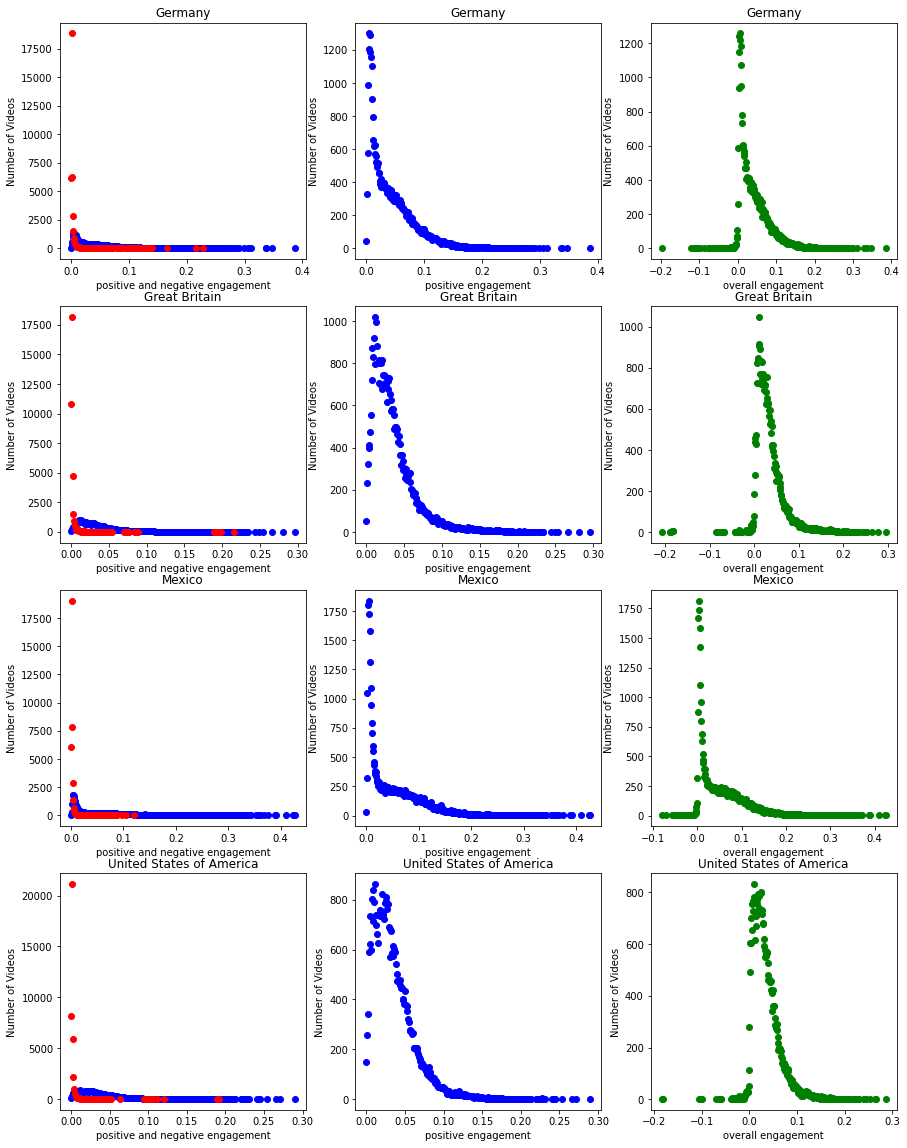

In [77]:
title_label=['Germany','Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,20))

index_=1
counter=0

for i in range(4):

  plt.subplot(4,3,index_)
  plt.scatter(poseng_per_country[i][0],poseng_per_country[i][1],color='b')
  plt.scatter(negeng_per_country[i][0],negeng_per_country[i][1],color='r')
  plt.title(title_label[counter],  loc='center')
  plt.xlabel("positive and negative engagement")
  plt.ylabel("Number of Videos") 
  index_+=1

  plt.subplot(4,3,index_)
  plt.scatter(poseng_per_country[i][0],poseng_per_country[i][1],color='b')
  plt.title(title_label[counter],  loc='center')
  plt.xlabel("positive engagement")
  plt.ylabel("Number of Videos")  
  index_+=1

  plt.subplot(4,3,index_)
  plt.scatter(oveng_per_country[i][0],oveng_per_country[i][1],color='g')
  plt.title(title_label[counter],  loc='center')
  plt.xlabel("overall engagement")
  plt.ylabel("Number of Videos")  
  index_+=1

  counter+=1
plt.show()

It is clear from the data that the tendency for all the country is that $>75\%$ of the trending videos have  in the range $50\%$-$50\%$ or $60\%$-$40\%$ split on likes and dislikes.

The data seems to point to  the fact that  the odds of a video for becoming trendending are higher when it has roughtlly equal split among likes and dislikes. So it seems that a video that polarizes opinions is more likelly to become trending

In [78]:
#saving data
temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_19_12", "wb")
pickle.dump(data_treat,temporal_data)
temporal_data.close()

FileNotFoundError: ignored

## Descriptive statistics for the metrics

### Box Plots and outliers

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


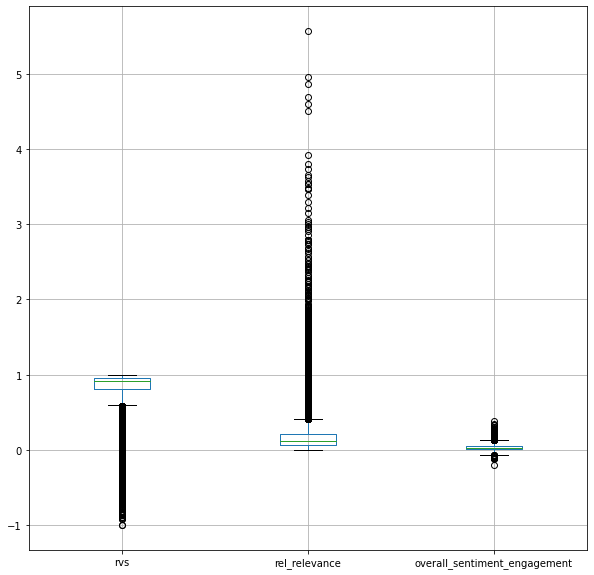

In [79]:
plt.figure(figsize=(10,10))

data_treat[0].boxplot(column=['rvs', 'rel_relevance', 'overall_sentiment_engagement'])

plt.show()

The box plots are used to creat windows of data which preserve about $90\%$ of the data while getting atributes that follow a normal distrinution. We are "removing" outliers.

#### Checking `rvs`

In [80]:
#data presrved
for i in range(4):
  print(round(len(data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)])/len(data_treat[i]['rvs']),2))

0.92
0.92
0.92
0.92


In [81]:
#relative difference between mean and meadian

for i in range(4):
  m=np.mean(data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)])
  med=np.median(data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)])

  val = [m,med]

  print(round(1-min(val)/max(val),2))

0.04
0.02
0.04
0.03


In [82]:
#Excess kurtosis and skwewness Test

country=['Germany', 'Great britain', 'Mexico', 'United States of America']


for i in range(4):

  x=data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)]

  
  print( 'excess kurtosis for {} (should be 0, from -2 to +2 acceptable): {}'.format(country[i], round(kurtosis(x),2) ))
  print( 'skewness of normal distribution (should be 0): {}'.format( skew(x) ))

excess kurtosis for Germany (should be 0, from -2 to +2 acceptable): 1.21
skewness of normal distribution (should be 0): -1.3550106519465697
excess kurtosis for Great britain (should be 0, from -2 to +2 acceptable): 1.96
skewness of normal distribution (should be 0): -1.493813498163566
excess kurtosis for Mexico (should be 0, from -2 to +2 acceptable): 0.93
skewness of normal distribution (should be 0): -1.3027456710271912
excess kurtosis for United States of America (should be 0, from -2 to +2 acceptable): 1.76
skewness of normal distribution (should be 0): -1.4884356596882786


In [83]:
country=['Germany','Great Britain', 'Mexico', 'United States of America']
for j in range(4):

  print(country)
  x=data_treat[j]['rvs'][data_treat[j]['rvs']>data_treat[j]['rvs'].quantile(0.1)]

  result = anderson(x)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
	  sl, cv = result.significance_level[i], result.critical_values[i]
	  if result.statistic < result.critical_values[i]:
		  print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	  else:
		  print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

['Germany', 'Great Britain', 'Mexico', 'United States of America']
Statistic: 1505.366
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
['Germany', 'Great Britain', 'Mexico', 'United States of America']
Statistic: 1269.433
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
['Germany', 'Great Britain', 'Mexico', 'United States of America']
Statistic: 1717.138
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000

By removing the data bellow the $8\%$ "quartle", we preserve $92\%$ of the data and our data becomes normal-like distributed. By doing this, we are considering all the vidos that become trending with higher number of dislikes than likes as outlieres

#### Checking `rel_relevance`

In [84]:
#data presrved
for i in range(4):
  print(round(len(data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)])/len(data_treat[i]['rel_relevance']),2))

0.92
0.92
0.92
0.92


In [85]:
#relative difference between mean and meadian

for i in range(4):
  m=np.mean(data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)])
  med=np.median(data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)])

  val = [m,med]

  print(round(1-min(val)/max(val),2))

0.18
0.21
0.18
0.16


In [86]:
#kurtosis Test

for i in range(4):
  print(round(data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)].kurt(),2))

0.59
1.38
0.52
0.95


In [87]:
x=data_treat[0]['rel_relevance'][data_treat[0]['rel_relevance']<data_treat[0]['rel_relevance'].quantile(0.92)]

result = anderson(x)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 995.587
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [88]:
pd.concat([data_treat[0].describe(),
           pd.DataFrame(data_treat[0].median() , columns = ["Median"] ).T,
           pd.DataFrame(data_treat[0].kurt() , columns = ["Kurtosis"] ).T])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


,category_id,views,likes,dislikes,comment_count,rvs,rel_relevance,positive sentiment_engagement,negative sentiment_engagement,overall_sentiment_engagement
count,39112.000000,3.911200e+04,3.911200e+04,3.911200e+04,3.911200e+04,39108.000000,39108.000000,39112.000000,39112.000000,39112.000000
mean,20.683141,6.073544e+05,2.234267e+04,1.346093e+03,2.794185e+03,0.838726,0.179524,0.040425,0.002175,0.038254
std,6.917800,2.342922e+06,1.025020e+05,1.430414e+04,1.691975e+04,0.214285,0.228698,0.037853,0.005140,0.037526
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,-0.198000
25%,20.000000,2.887500e+04,6.050000e+02,3.200000e+01,9.400000e+01,0.811000,0.069000,0.010000,0.001000,0.009000
50%,24.000000,1.235645e+05,2.907500e+03,1.430000e+02,4.090000e+02,0.914000,0.116000,0.029000,0.001000,0.027000
75%,24.000000,4.462252e+05,1.234900e+04,5.490000e+02,1.438000e+03,0.958000,0.205000,0.060000,0.002000,0.057000
max,43.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06,1.000000,5.566000,0.387000,0.228000,0.385000
Median,24.000000,1.235645e+05,2.907500e+03,1.430000e+02,4.090000e+02,0.914000,0.116000,0.029000,0.001000,0.027000
Kurtosis,2.555684,5.029820e+02,5.654227e+02,6.314433e+03,1.607669e+03,15.078994,69.986055,3.641730,401.951512,3.770514


In [89]:
data_treat[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,rvs,rel_relevance,positive sentiment_engagement,negative sentiment_engagement,overall_sentiment_engagement
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 00:00:00,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...,0.987,0.043,0.142,0.001,0.141
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 00:00:00,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...,0.989,0.024,0.067,0.000,0.067
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 00:00:00,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",0.881,0.123,0.040,0.003,0.038
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12 00:00:00,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3 ‚úöSna...,0.972,0.061,0.084,0.001,0.082
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12 00:00:00,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup über den (veränderten) Beat von...,0.952,0.099,0.122,0.003,0.119
